In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from ImportData import ImportPriceData
from PairPotential import PairClusters
from PairValidator import PairValidate



# Set the start/end date for the price import class
start_date = "2020-01-01"
end_date = "2021-05-11"

# Import the prices with the given dates
import_price = ImportPriceData(start_date=start_date, end_date=end_date)
prices_sp500 = import_price.get_price_data()
returns_sp500 = import_price.get_returns_data()

The clusters formed by the OPTICS after PCA: 
    Stocks  ClusterID
0        A         -1
1      AAL          0
2      AAP         -1
3     AAPL          4
4     ABBV         -1
..     ...        ...
499    YUM         -1
500    ZBH         -1
501   ZBRA         -1
502   ZION          2
503    ZTS         -1

[504 rows x 2 columns]
The number of clusters formed:  {11}
The potential pairs created before the filtering process: 
[('AAL', 'LUV'), ('LUV', 'UAL'), ('AAL', 'UAL'), ('AAL', 'DAL'), ('AAL', 'ALK'), ('BA', 'LUV'), ('DAL', 'LUV'), ('DAL', 'UAL'), ('ALK', 'BA'), ('ALK', 'LUV'), ('ALK', 'UAL'), ('AAL', 'BA'), ('BA', 'DAL'), ('BA', 'UAL'), ('ALK', 'DAL'), ('BXP', 'FRT'), ('FRT', 'VNO'), ('BXP', 'VNO'), ('KIM', 'REG'), ('FRT', 'REG'), ('BXP', 'KIM'), ('BXP', 'REG'), ('FRT', 'KIM'), ('KIM', 'VNO'), ('REG', 'VNO'), ('CFG', 'KEY'), ('BAC', 'HBAN'), ('CMA', 'KEY'), ('CFG', 'HBAN'), ('KEY', 'PNC'), ('FITB', 'USB'), ('FITB', 'RJF'), ('CMA', 'USB'), ('BAC', 'FITB'), ('FITB', 'RF'), ('KEY', '

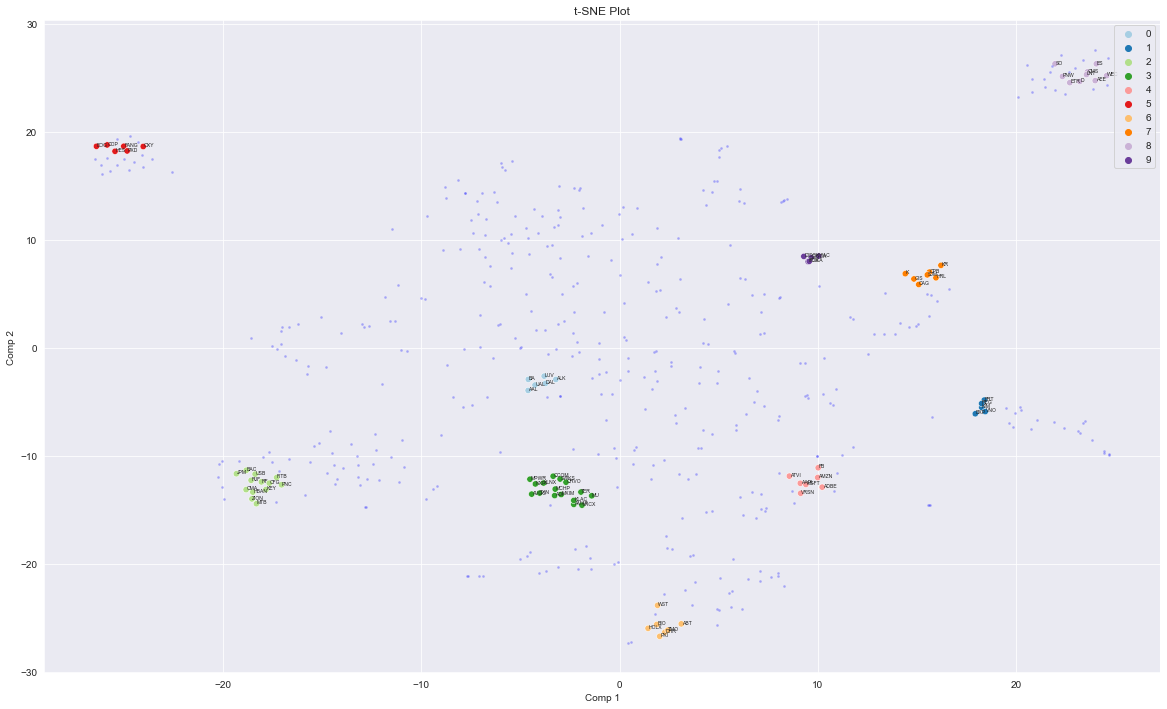

In [8]:
# Form the clusters, i.e. the potential pairs.
selector: PairClusters = PairClusters(prices_sp500, returns_sp500)
selector.optics()
potential_pairs = selector.create_potential_pairs(display_pairs_info=True)
selector.plot_tsne()

Number of potential pairs in before filter: 347
Hurst filter pass: 320
Co-integration filter pass: 14
Half-life filter pass: 12
Mean-cross filter pass: 3
Final Number of validated pairs: 3
The final validated pairs are: 
[['CPB', 'KR'], ['GIS', 'K'], ['CPB', 'GIS']]


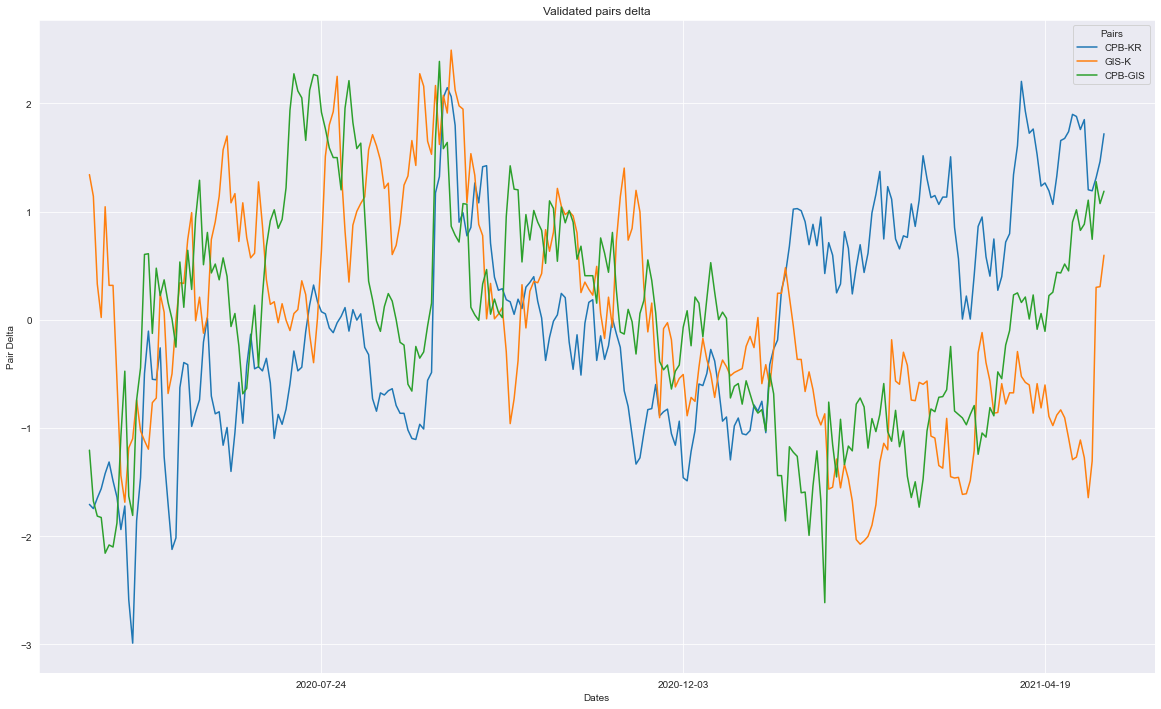

In [11]:
# Create the strategy validator
validator = PairValidate(price_data=prices_sp500, pairs_data=potential_pairs)
validator.apply_filters()
validator.visualize_pairs(individualize=False, normalize=True)

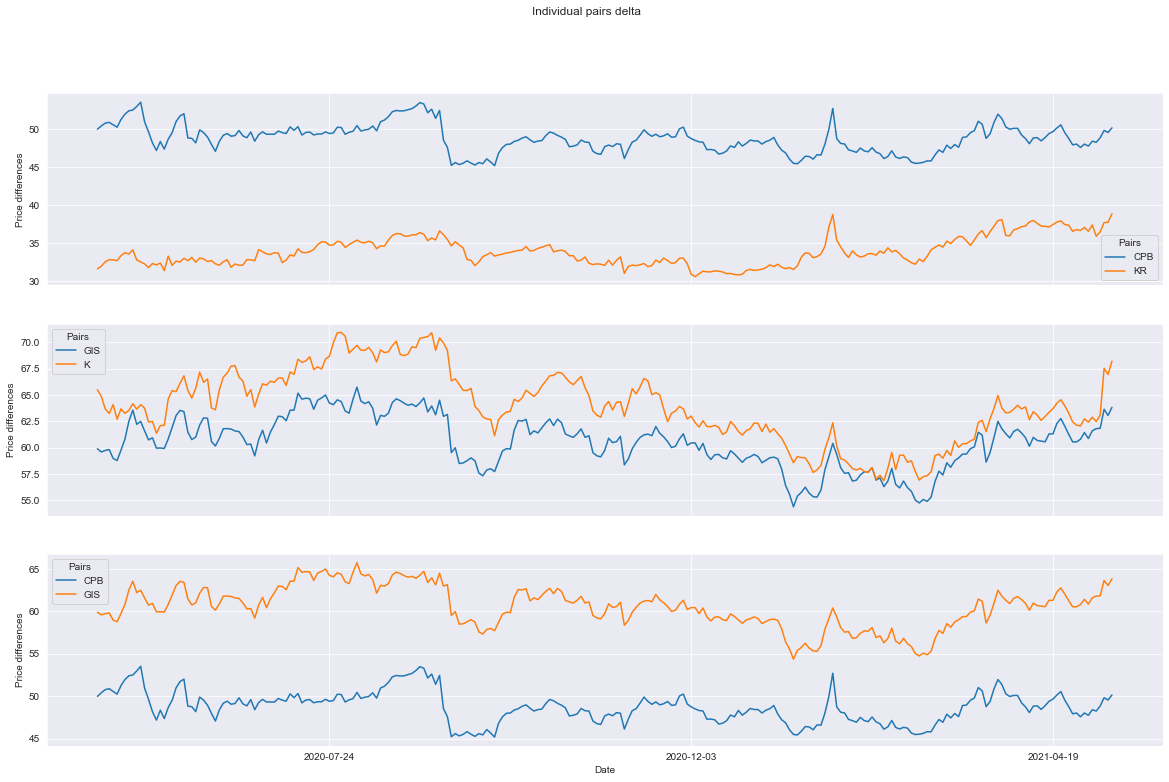

In [10]:
validator.visualize_pairs(individualize=True) # For common plots of pairs